In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import sys

### Functions

In [2]:
def get_energy_data(data, time, maxslices, nref, dt, noise, step, e_level, num_runs):
    runs = np.linspace(1, num_runs, num_runs, dtype = int)
    energies = []
    filepath = "/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Johnson_code/%s/%s/data/"%(data,time)
    for run in runs:
        i = int(run)-1
        filename = "%s_%s_%s_%s_%s_%s_%s.dat"%(data,time,str(maxslices),str(nref),str(dt),str(noise),str(run))
        file = os.path.join(filepath, filename)
        with open(file) as f:
            lines = f.readlines()
            line = lines[step + e_level]
            line = line.split()
            energies.append(line[e_level + 1])

    energies = np.array(energies)
    energies = energies.astype(np.float)
    return energies

def average_energies(energies,num_runs):
    avg_energies = np.mean(energies[0:num_runs-1])
        
    return avg_energies

def std_dev(energies,avg_energies,num_runs):
    num_runs_array = np.linspace(1,num_runs,num_runs, dtype = int)
    sum = 0
    for run in num_runs_array:
        sum = sum + (energies[run-1] - avg_energies)**2
    error = np.sqrt(sum/num_runs)
    sum = 0
        
    return error

def plot(data,time,nref,tau0,dt,noise,maxtimes,results,std_errors,exact,hf):
    plt.errorbar(maxtimes,results,std_errors,marker='o',capsize=5)
    plt.xlabel('k')
    plt.ylabel('Energy (MeV)')
    plt.rcParams['figure.figsize'] = [12.5, 10]
    plt.axhline(y=exact, color='r', linestyle='-')
    if time=="im":
        plt.legend(['Exact Energy', 'ITE'], loc='upper right', numpoints=1)
    elif time=="re":
        plt.legend(['Exact Energy', 'RTE'], loc='upper right', numpoints=1)
    

### Hartree-Fock Energies

In [3]:
ne20_hf = -36.404
na22_hf = -54.653
na29_hf = -104.784

### Exact Energies

In [4]:
ne20_exact = [-40.47233,-38.72564,-36.29706,-33.77415,-32.92937]
na22_exact = [-58.44285,-58.10455,-57.57816,-57.48698,-56.90493]
na29_exact = [-107.06200,-106.99092,-105.01745,-104.90842,-104.31960]

### E vs. t

In [5]:
# Inputs parameters
data = "na29"   # data set to use (ne20, na22, na29)
time = "re"
dt = 0.01       # time step size
noise = 0       # added noise (percent)
num_runs = 100  # # of runs
nref = 5
maxslices = 9

if time=="im":
    script="laQMCdemo.sh"
elif time=="re":
    script="claQMCdemo.sh"
else:
    sys.exit("Invalid time input.")

if data=="ne20":
    tau0 = 0.194
    hf = ne20_hf
elif data=="na22":
    tau0 = 0.237
    hf = na22_hf
elif data=="na29":
    tau0 =  0.330
    hf = na29_hf
else:
    sys.exit("Invalid data input.")
    
if data=="ne20":
    exact = ne20_exact
elif data=="na22":
    exact = na22_exact
elif data=="na29":
    exact = na29_exact
else:
    sys.exit("Invalid data input.")
    

In [6]:
!bash /Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Johnson_code/$script -i $num_runs -d $data -t $time -m $maxslices -r $nref -p $tau0 -s $dt -n $noise >/dev/null 2>&1


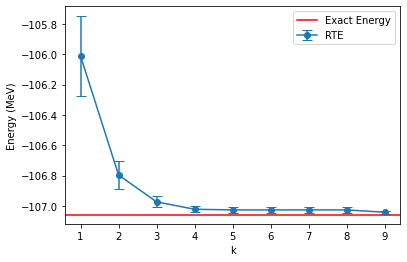

In [7]:
#e_level 0
e_level = 0

energies = []
avg_energies = []
error = []

for step in range(maxslices-e_level):
    energies_step = get_energy_data(data,time,maxslices,nref,dt,noise,step,e_level,num_runs)
    avg_energies_step = average_energies(energies_step,num_runs)
    error_step = std_dev(energies_step,avg_energies_step,num_runs)
    energies.append(energies_step)
    avg_energies.append(avg_energies_step)
    error.append(error_step)
    
energies = np.concatenate(energies)
avg_energies = np.stack(avg_energies, axis=0)
error = np.stack(error, axis=0)

k = np.linspace(1+e_level, maxslices, maxslices-e_level, dtype = float, endpoint=True)

plot(data,time,nref,tau0,dt,noise,k,avg_energies[0:len(k)],error[0:len(k)],exact[e_level],hf)


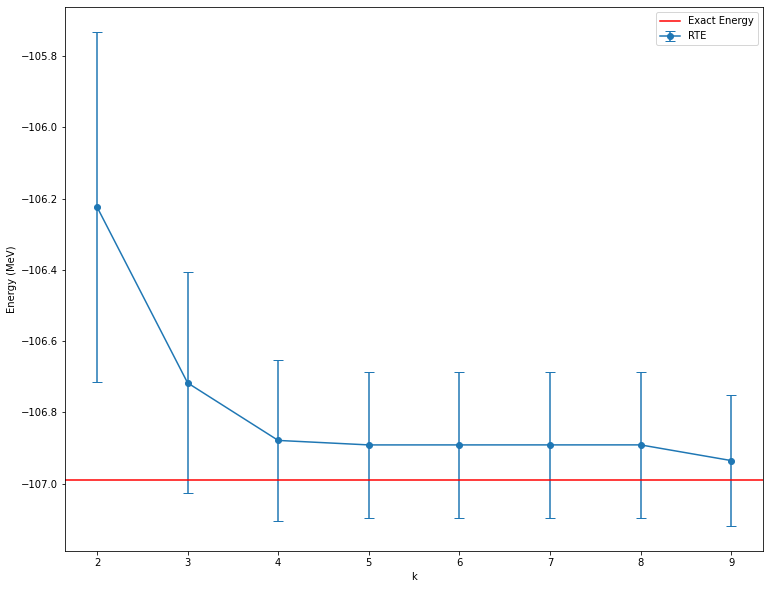

In [8]:
#e_level 1
e_level = 1

energies_1 = []
avg_energies_1 = []
error_1 = []

for step in range(maxslices-e_level):
    energies_step = get_energy_data(data,time,maxslices,nref,dt,noise,step,e_level,num_runs)
    avg_energies_step = average_energies(energies_step,num_runs)
    error_step = std_dev(energies_step,avg_energies_step,num_runs)
    energies_1.append(energies_step)
    avg_energies_1.append(avg_energies_step)
    error_1.append(error_step)
    
energies_1 = np.concatenate(energies_1)
avg_energies_1 = np.stack(avg_energies_1, axis=0)
error_1 = np.stack(error_1, axis=0)

k_1 = np.linspace(1+e_level, maxslices, maxslices-e_level, dtype = float, endpoint=True)

plot(data,time,nref,tau0,dt,noise,k_1,avg_energies_1[0:len(k_1)],error_1[0:len(k_1)],exact[e_level],hf)


In [9]:
#e_level 2
e_level = 2

energies_2 = []
avg_energies_2 = []
error_2 = []

for step in range(maxslices-e_level):
    energies_step = get_energy_data(data,time,maxslices,nref,dt,noise,step,e_level,num_runs)
    avg_energies_step = average_energies(energies_step,num_runs)
    error_step = std_dev(energies_step,avg_energies_step,num_runs)
    energies_2.append(energies_step)
    avg_energies_2.append(avg_energies_step)
    error_2.append(error_step)
    
energies_2 = np.concatenate(energies_2)
avg_energies_2 = np.stack(avg_energies_2, axis=0)
error_2 = np.stack(error_2, axis=0)

k_2 = np.linspace(1+e_level, maxslices, maxslices-e_level, dtype = float, endpoint=True)

#plot(data,time,nref,tau0,dt,noise,k_2,avg_energies_2[0:len(k_2)],error_2[0:len(k_2)],exact[e_level],hf)


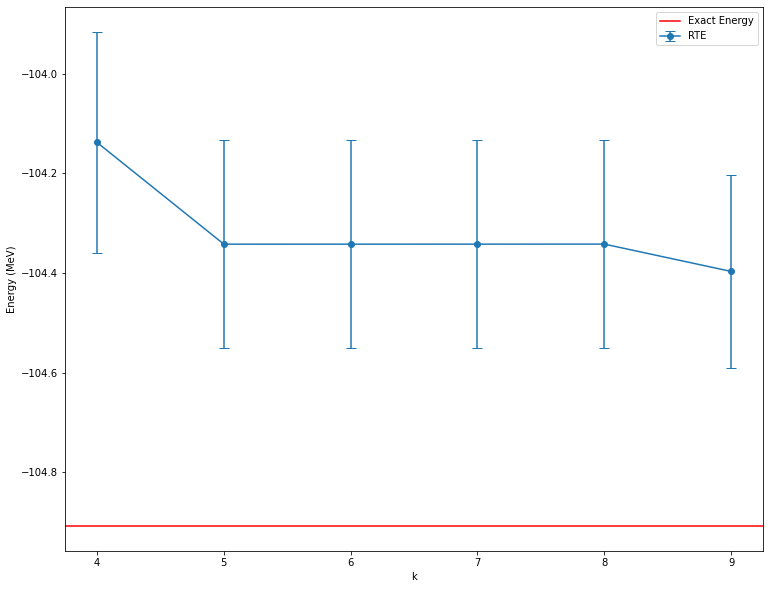

In [10]:
#e_level 3
e_level = 3

energies_3 = []
avg_energies_3 = []
error_3 = []

for step in range(maxslices-e_level):
    energies_step = get_energy_data(data,time,maxslices,nref,dt,noise,step,e_level,num_runs)
    avg_energies_step = average_energies(energies_step,num_runs)
    error_step = std_dev(energies_step,avg_energies_step,num_runs)
    energies_3.append(energies_step)
    avg_energies_3.append(avg_energies_step)
    error_3.append(error_step)
    
energies_3 = np.concatenate(energies_3)
avg_energies_3 = np.stack(avg_energies_3, axis=0)
error_3 = np.stack(error_3, axis=0)

k_3 = np.linspace(1+e_level, maxslices, maxslices-e_level, dtype = float, endpoint=True)

plot(data,time,nref,tau0,dt,noise,k_3,avg_energies_3[0:len(k_3)],error_3[0:len(k_3)],exact[e_level],hf)


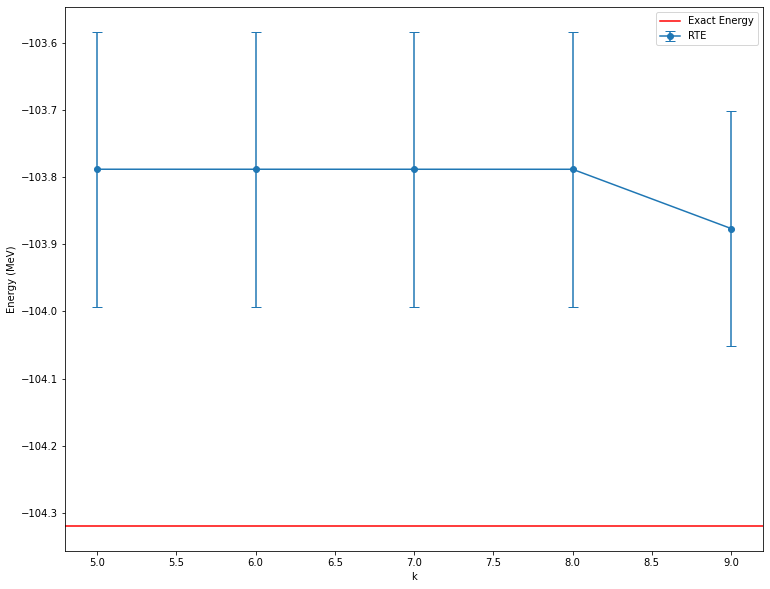

In [11]:
#e_level 4
e_level = 4

energies_4 = []
avg_energies_4 = []
error_4 = []

for step in range(maxslices-e_level):
    energies_step = get_energy_data(data,time,maxslices,nref,dt,noise,step,e_level,num_runs)
    avg_energies_step = average_energies(energies_step,num_runs)
    error_step = std_dev(energies_step,avg_energies_step,num_runs)
    energies_4.append(energies_step)
    avg_energies_4.append(avg_energies_step)
    error_4.append(error_step)
    
energies_4 = np.concatenate(energies_4)
avg_energies_4 = np.stack(avg_energies_4, axis=0)
error_4 = np.stack(error_4, axis=0)

k_4 = np.linspace(1+e_level, maxslices, maxslices-e_level, dtype = float, endpoint=True)

plot(data,time,nref,tau0,dt,noise,k_4,avg_energies_4[0:len(k_4)],error_4[0:len(k_4)],exact[e_level],hf)


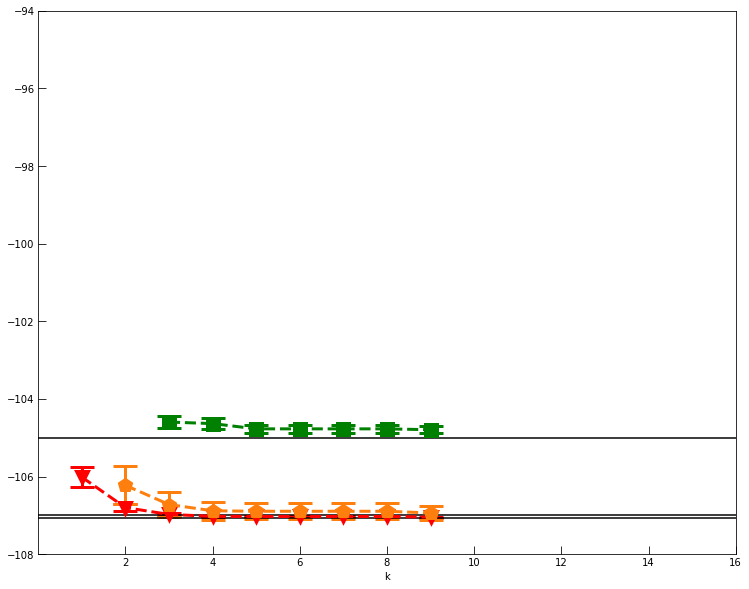

In [12]:
#Compare
ax = plt.subplot(111)  
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
ax.spines["bottom"].set_visible(True)  
ax.spines["left"].set_visible(True)
plt.rcParams.update({'font.size': 20})
ax.tick_params(direction='in', length=8)

p1 = plt.errorbar(k,avg_energies[0:len(k)],error[0:len(k)],label='ground state',marker='v',linestyle='dashed',color='r',linewidth=3,markersize=12,capsize=12,markeredgewidth=3)
p2 = plt.errorbar(k_1,avg_energies_1[0:len(k_1)],error_1[0:len(k_1)],label='1st excited',marker='p',linestyle='dashed',color='tab:orange',linewidth=3,markersize=12,capsize=12,markeredgewidth=3)
p3 = plt.errorbar(k_2,avg_energies_2[0:len(k_2)],error_2[0:len(k_2)],label='2nd excited',marker='s',linestyle='dashed',color='g',linewidth=3,markersize=12,capsize=12,markeredgewidth=3)
#p4 = plt.errorbar(k_3,avg_energies_3[0:len(k_3)],error_3[0:len(k_3)],label='3rd excited',marker='o',linestyle='dashed',color='b',linewidth=3,markersize=12,capsize=12,markeredgewidth=3)
#p5 = plt.errorbar(k_4,avg_energies_4[0:len(k_4)],error_4[0:len(k_4)],label='4th excited',marker='D',linestyle='dashed',color='rebeccapurple',linewidth=3,markersize=12,capsize=12,markeredgewidth=3)

p6 = plt.axhline(y=exact[0], color='k',label='exact')
p7 = plt.axhline(y=exact[1], color='k')
p8 = plt.axhline(y=exact[2], color='k')
#p9 = plt.axhline(y=exact[3], color='k')
#p10 = plt.axhline(y=exact[4], color='k')

plt.xlabel('k')
if nref == 1:
    plt.ylabel('Energy (MeV)')


plt.xlim([0,16])
ax.set_xticks([2,4,6,8,10,12,14,16])

if data=="ne20":
    plt.ylim([-45, -15])
    ax.set_yticks([-15,-20,-25,-30,-35,-40,-45])
elif data=="na22":
    plt.ylim([-60, -40])
    ax.set_yticks([-40,-45,-50,-55,-60])
elif data=="na29":
    plt.ylim([-108, -94])
    ax.set_yticks([-94,-96,-98,-100,-102,-104,-106,-108])

plt.rcParams['figure.figsize'] = [12.5, 10]
if nref == 3:
    plt.legend(loc='upper right')

plt.savefig('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Johnson_code/%s/plots/spectrum_%s_%s_%srefs_%sdt_%snoise.png'%(data,data,time,str(nref),str(dt),str(noise)), facecolor='white', edgecolor='none', dpi=300, bbox_inches='tight')
    

In [13]:
avg_energies[maxslices-1]

-107.04158919191919

In [14]:
avg_energies_1[maxslices-2]

-106.93552131313132

In [15]:
avg_energies_2[maxslices-3]

-104.7920487878788

In [16]:
avg_energies_3[maxslices-4]

-104.39697101010101

In [17]:
avg_energies_4[maxslices-5]

-103.87668101010101